### <font color='blue'>*Комментарий наставника*</font>
Привет. Меня зовут Аня Прокашева и я проверяла твою работу. <br>
Отличная работа! Очень детально и четко составлены тезисы, легко отследить весь ход решения. <br>
Единственный момент, хотелось бы добавить информации про то, как метрики отличаются на разных устройствах, это должно помочь маркетологам еще лучше распределить затраты. Например, как отличается средний чек на десктопе и на мобильных устройствах? И т.д. Вполне возможно, что не каждую метрику стоит раскладывать по устройствам. Подумай, где это может сыграть роль и возможно ты добавишь несколько пунктов к тезисам. 


Привет, Аня! Спасибо.

Все добавил в отдельный блок, перед финальным выводом.


## Аналитика в Яндекс.Афише

#### Необходимо помочь маркетологам оптимизировать маркетинговые затраты.

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.


Нужно изучить:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

### Описание данных

##### Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

##### Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс. Афиши с этого заказа

##### Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

## Оглавление
### Глава 1. Загрузка библиотек и данных
- Импорт бибилотек
- Загрузка данных и изучение общей информации
- Вывод

### Глава2. Предобработка данных
- Детальное изучение данных
- Изучение переменных
- Вывод

### Глава 3 Отчеты и метрики о продукте
- Количество уникальных пользователей в день, неделю и месяц
- Пользовательские сессии
- Количество сессий в день
- Длительность одной сессии
- Retention Rate
- Вывод

### Глава 4 Отчеты и метрики о продажах
- Период перед первой покупкой
- Рассчитываем средний чек
- Количество покупок за период
- Рассчитываем метрику LTV
- Вывод


### Глава 5. Анализ маркетинговых показателей
- Суммарные рассходы с разбивкой по рекламным источникам и месяцам
- Стоимость привлечения одного покупателя из каждого рекламного источника
- Рассчитываем метрику ROI

### Финальный вывод



###  Глава 1. Загрузка библиотек и данных


### Импорт бибилотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from scipy import stats as st
import datetime

### Загрузка данных и изучение общей информации


In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [5]:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Количество и названия столбцов совпадает с заявленными.

In [6]:
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [8]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

Во всех датасетах нет пропущенных значений

In [9]:
visits.duplicated().sum()

0

In [10]:
orders.duplicated().sum()

0

In [11]:
costs.duplicated().sum()

0

Во всех датасетах нет повторяющихся значений

#### Вывод
В данных отсутствуют повторяющиеся значения и пропуски. Однако временные показатели представлены в строковом формате. Данные значения необходимо привести к формату даты. Также, для удобства заменим названия столбцов.  

## Глава2. Предобработка данных


In [12]:
# Заменяем названия столбцов
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] 
orders.columns = ['buy_ts', 'revenue', 'uid'] 
costs.columns = ['source_id', 'date', 'costs']

In [13]:
# Переводим в формат даты
visits['end_ts'] = pd.to_datetime(
    visits['end_ts'], 
    format='%Y-%m-%d %H:%M'
)
visits['start_ts'] = pd.to_datetime(
    visits['start_ts'],
    format='%Y-%m-%d %H:%M' 
)
orders['buy_ts'] = pd.to_datetime(
    orders['buy_ts'],
    format='%Y-%m-%d %H:%M:%S'
)
costs['date'] = pd.to_datetime(
    costs['date'],
    format='%Y-%m-%d')

### Детальное изучение данных


#### Изучение перменных 

In [14]:
# Посмотрим какие технические средства используют пользователи
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

В большей степени пользователи переходят на сайт используя ПК (компьютер, ноутбук). Остальные переходы осуществляются через мобильное устройство.

In [15]:
# Посмотрим количество рекламных источников
visits['source_id'].value_counts().reset_index().sort_values('index')

,index,source_id
4,1,34121
3,2,47626
1,3,85610
0,4,101794
2,5,66905
8,6,6
7,7,36
5,9,13277
6,10,10025


Всего 10 рекламных источников. Один из них отсутствует. Возможно, это связано с технической ошибкой или отсутствием переходов с данного рекламного размещения. Также, есть два рекламных источника с наименьшими переходами. 

In [16]:
# Посмотрим количество рекламных истончиков, на которые выделяет средства маркетинг
costs['source_id'].value_counts().reset_index().sort_values('index')

,index,source_id
3,1,363
6,2,363
2,3,363
5,4,363
0,5,364
1,9,363
4,10,363


Так же, как и в предыдущей таблице отсутвует 8 рекламный источник. 

In [17]:
costs['costs'].describe() # С помощью метода describe() смотрим на распределение и основные значения

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

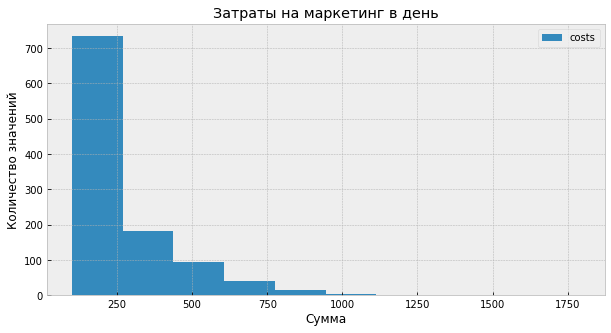

In [18]:
plt.style.use('bmh')

costs.query('100 < costs < 1800').plot(kind='hist', y='costs', figsize=(10, 5)).set(xlabel='Сумма', 
                                                                                    ylabel='Количество значений')
plt.title('Затраты на маркетинг в день')
plt.show()

# Строим график ориентируясь на примерные значения

В целом затраты на маркетинг сосредоточены в районе 200-250 рублей. Также, есть редкие случаи затрат более 1 000  рублей. Рассмотрим подробнее долю распределения затрат на каждый рекламный источник.

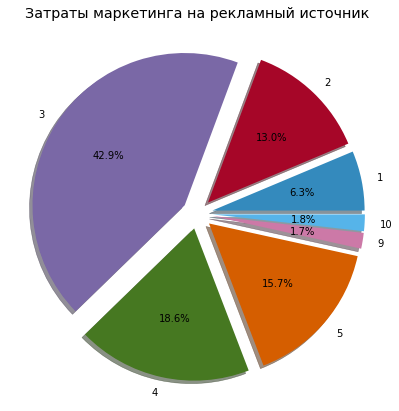

In [19]:
costs.pivot_table(
        index='source_id',
        values='costs',
        aggfunc='sum'
).plot(
        kind='pie',
        autopct='%1.1f%%',
        figsize=(7,7),
        title='Затраты маркетинга на рекламный источник',
        y='costs',
        legend=False,
        explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
        shadow=True
    
)
plt.ylabel('')
plt.show()

### Вывод
Мы подобробно изучили полученные данные и выявили некоторые особенности. Пользователи чаще используют компьютер/ноутбук во время перехода на сайт. Необходимо обратить внимание на мобильную версию сайта, возможно, проверить приложение на корректную работу. 

В представленных данных отсутсвует отдин из рекламных источников. Необходимо уточнить про его существование и в целом про типы данных рекламных размещений. Это позволит составить более полную картину работы маркетинга. Помимо этого мы узнали, что в целом ежедневные маркетинговые затраты составляют 200-250 рублей. Также, выявили долю затрат на все рекламные размещения. 

## Глава 3 Отчеты и метрики о продукте

#### Количество уникальных пользователей в день, неделю и месяц

In [20]:
# Для подсчета отдельно выделяем день, неделю, месяц, год и полную дату
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['sessin_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [21]:
# Уникальные пользователи в день, неделю и месяц
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'sessin_week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

In [22]:
sticky_factory_wau = (dau_total / wau_total) * 100
sticky_factory_mau = (dau_total / mau_total) * 100

In [23]:
print('Кол-во уникальных пользователей в день:', int(dau_total))
print()
print('Кол-во уникальных пользователей в неделю:', int(wau_total))
print()
print('Кол-во уникальных пользователей в месяц:', int(mau_total))
print()
print('Регулярность использования приложения в неделю:', int(sticky_factory_wau), '%')
print()
print('Регулярность использования приложения в месяц:', int(sticky_factory_mau), '%')

Кол-во уникальных пользователей в день: 907

Кол-во уникальных пользователей в неделю: 5716

Кол-во уникальных пользователей в месяц: 23228

Регулярность использования приложения в неделю: 15 %

Регулярность использования приложения в месяц: 3 %


### Пользовательские сессии

#### Количество сессий в день

In [24]:
session_total = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
session_total.columns = ('session_number', 'users_number')
session_total['session_per_user'] = (session_total['session_number'] / session_total['users_number']).round(2)

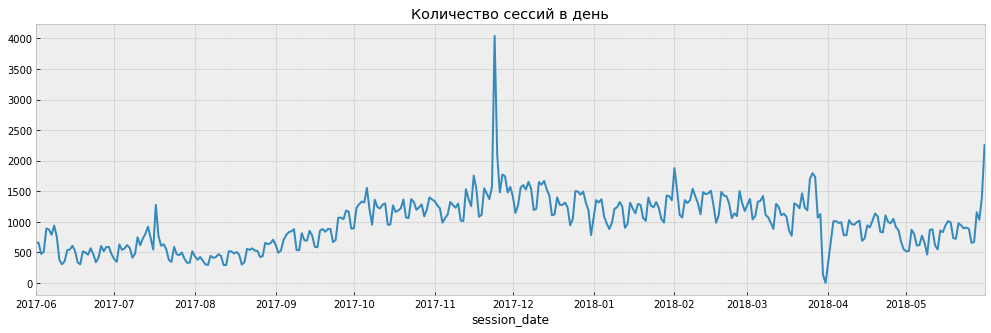

In [25]:
session_total.plot(y='session_number', 
                   figsize=(17,5), title='Количество сессий в день',
                   legend=False  
                  )
plt.show()

Согласно полученным данным, в 2017 году наблюдается тенденция роста в ежедневном использовании Яндекс.Афиши. Есть отдельные всплески, которые могут быть связаны с акционными предложениями или популярными мероприятиями. После 2018 года, наблюдается снижение количества посещений. И даже некоторые просадки, которые могут быть связаны с техническими поломками сайта. 

In [26]:
session_total

,session_number,users_number,session_per_user
session_date,,,
2017-06-01,664,605,1.10
2017-06-02,658,608,1.08
2017-06-03,477,445,1.07
2017-06-04,510,476,1.07
2017-06-05,893,820,1.09
...,...,...,...
2018-05-27,672,620,1.08
2018-05-28,1156,1039,1.11
2018-05-29,1035,948,1.09


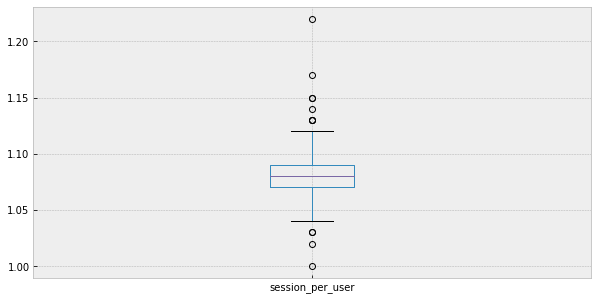

In [27]:
# Для учета всех значений построим распределение количества сессий на пользователя в день
session_total.boxplot('session_per_user', figsize=(10, 5))
plt.show()

In [28]:
session_total.session_per_user.mean()

1.0823901098901099

В целом, один пользователь в среднем проводит максимум 1,08 сессии в день. Это говорит нам о том, что данный продукт используется не регулярно. 

#### Длительность одной сессии

Находим ASL (англ. average session length) — средняя продолжительность сессии. Для этого нужно посчитать длину всех сессий и вычислить среднее.

In [29]:
visits['sess_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

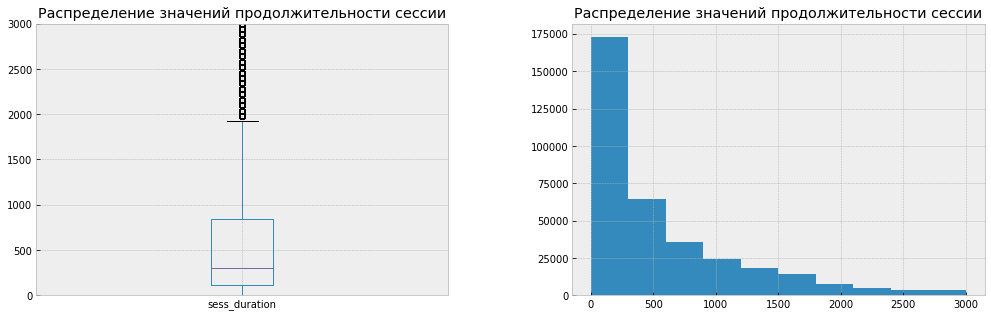

In [30]:
plt.subplots(figsize=(17,5))
plot = visits.boxplot(
    'sess_duration',
    ax = plt.subplot(1,2,1)
)
plt.title('Распределение значений продолжительности сессии')
plt.ylim(0,3000)
plot = visits.hist(
    'sess_duration',
    ax = plt.subplot(1,2,2),
    range=(0,3000)
)
plt.title('Распределение значений продолжительности сессии');

Самая частая продолжительность сессии составляет 200-300 секунд ~ 4 минуты.

In [31]:
# Посмотрим среднее по всем сессиям
visits['sess_duration'].mean()

643.506488592098

Средняя продолжительность 643 секунды ~ 10 минут. Изучим более детально временную продолжительность за счет выделения определенной доли сессий

In [32]:
session_ratio = visits.query('sess_duration < 500')['sess_duration'].count() / visits['sess_duration'].count()
print('Распространенность сессий с дилтельностью до 500 секунд от общего числа сессий: {:.1%}'.format(session_ratio))

Распространенность сессий с дилтельностью до 500 секунд от общего числа сессий: 63.4%


То есть, коротких временных сессий гораздо больше чем длительных (от 10 и более минут). Необходимо узнать медианные значения.

In [33]:
visits.query('sess_duration < 500')['sess_duration'].median()

120.0

In [34]:
visits['sess_duration'].mode()[0]

60

Итак, основная продолжительность сессии составляет около 2х минут. А самое встречаемое значение в данной выборке равно 1 минуте. Это означает, что большая часть сессий — короткие. 

### Retention Rate

Рассчитываем коэффициент удержания (возвращаемость пользователей). Для этого, разобъем пользователей на определенные когорты. Поскольку у нас годовой объем данных, мы сформируем когорты по месяцам. Визуализацию когортного анализа сделаем с помощью тепловой карты (heatmap).

In [35]:
# Вычисляем дату первой сессии для каждого пользователя
first_action_date = visits.groupby('uid')['start_ts'].min()
first_action_date.name = 'first_action_date'

In [36]:
# Прикрепляем эту дату к исходному датасету
visits = visits.join(first_action_date, on='uid')
visits['first_session_month'] = visits['first_action_date'].astype('datetime64[M]')

In [37]:
# Формируем lifetime — период за месяц
visits['cohort_lifetime'] = (visits['start_ts'] - visits['first_action_date']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [38]:
# Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»
cohorts = visits.groupby(['first_session_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [39]:
# Находим число пользователей, изначально бывших в когорте.
# Чтобы потом разделить на него число пользователей каждого следующего месяца.
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'number_cohort_users'}) # Переименовываем

In [40]:
# Объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count, on='first_session_month')

In [41]:
# Рассчитаем Retention Rate. 
# Разделим количество активных пользователей по каждому месяцу на исходное число пользователей в когорте
cohorts['retention'] = cohorts['uid'] / cohorts['number_cohort_users']
cohorts['first_session_month'] = cohorts['first_session_month'].dt.strftime('%Y-%m')

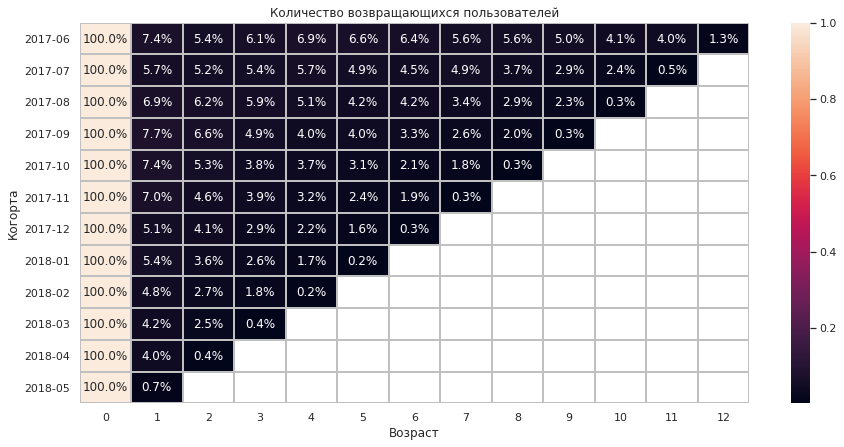

In [42]:
# Строим сводную таблицу и создаем тепловую карту
retention_pivot = cohorts.pivot_table(
        index = 'first_session_month',
        columns = 'cohort_lifetime',
        values = 'retention',
        aggfunc = 'sum'
)
sns.set(style='white')
plt.figure(figsize=(15,7))
plt.title('Количество возвращающихся пользователей')
sns.heatmap(
    retention_pivot,
    annot = True,
    fmt='.1%',
    linewidths = 1,
    linecolor = 'silver'
)
plt.xlabel('Возраст')
plt.ylabel('Когорта');

## Вывод

Итак, за рассматриваемый период среднее количество уникальных пользователей составляет 907 человек за день. Недельное посещение составляет 5 716 человек, а месячное — около 23 тыс. человек. При этом регулярность использования «Яндекс.Афиши» довольно низкая и составляет 15% в неделю, и 3% в месяц. Это означает, что пользователи редко обращаются к приложению/сайту.

В среднем в день совершается примерно 1 000 сессий. Однако, в период с 2018 года наблюдается снижение количества посещений и даже некоторые просадки. При этом самая частая продолжительность сессии составляет примерно 4 минуты. А медианное значение равно 2м минутам. То есть, короткие временные сессии значительно преобладают. Редкие сессии длящиеся более 10 минут составляют около 30% от общего числа.

Все это говорит нам о том, что данный продукт используется не регулярно. 


Коэффициент удержания пользователей — низкий, также наблюдается тенденция падения показателей с течением времени. Так, в майской когорте 2018 года уже в первый месяц низкий коэффициент возвращающихся пользователей — 0,7%. В сравнении с первой когортой июнь 2017 года — 7,4%. Стоит отметить, что до октября 2017 года наблюдается рост в возращении пользователей, но после этой даты идет стремительное снижение. Таким образом, отмечается быстроее сокращение коэффициента удержания у более молодых когорт. 

Возможно, это связано наступлением праздников, появлением популярных мероприятий, а также, акциями и распродажами на сайте. Помимо этого, могут наблюдаться технические ошибки в работе сайта, которые негативно влияют на восприятие пользоватлей. И появление новых платформ-агрегаторов по продаже биллетов. Необходимо уточнить с чем связано такое поведение когорт.


## Глава 4 Отчеты и метрики о продажах

### Период перед первой покупкой

In [43]:
# Группировка визитов по посетителям и выбор первой даты визита
customer_grouped = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()

# Группировка заказов по покупателям и выбор первой даты заказа
buyers_grouped = orders.groupby('uid').agg({'buy_ts':'min'})

In [44]:
# Объединяем данные о первом визите и первой покупке в одну таблицу
customer_to_buyers = pd.merge(customer_grouped, buyers_grouped, on='uid')

In [45]:
# Рассчитываем время между визитом и покупкой
customer_to_buyers['time_deal'] = customer_to_buyers['buy_ts'] - customer_to_buyers['start_ts']

In [46]:
customer_to_buyers.head() # Проверяем

,uid,start_ts,buy_ts,time_deal
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


Как мы видим, пользователи могут сделать первую покупку как через несколько минут, так и через пару дней. Поэтому рассчитаем time delta для минут, часов и дней

In [47]:
customer_to_buyers['time_deal_min'] = (customer_to_buyers['buy_ts'] - customer_to_buyers['start_ts']) / np.timedelta64(1, 'm')
customer_to_buyers['time_deal_hours'] = (customer_to_buyers['buy_ts'] - customer_to_buyers['start_ts']) / np.timedelta64(1, 'h')
customer_to_buyers['time_deal_day'] = (customer_to_buyers['buy_ts'] - customer_to_buyers['start_ts']) / np.timedelta64(1, 'D')

In [48]:
customer_to_buyers.head()

,uid,start_ts,buy_ts,time_deal,time_deal_min,time_deal_hours,time_deal_day
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00,154022.0,2567.033333,106.959722
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,0.0,0.000000,0.000000
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00,79.0,1.316667,0.054861
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00,1184.0,19.733333,0.822222
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,0.0,0.000000,0.000000


In [49]:
customer_to_buyers['time_deal'].describe()

count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: time_deal, dtype: object

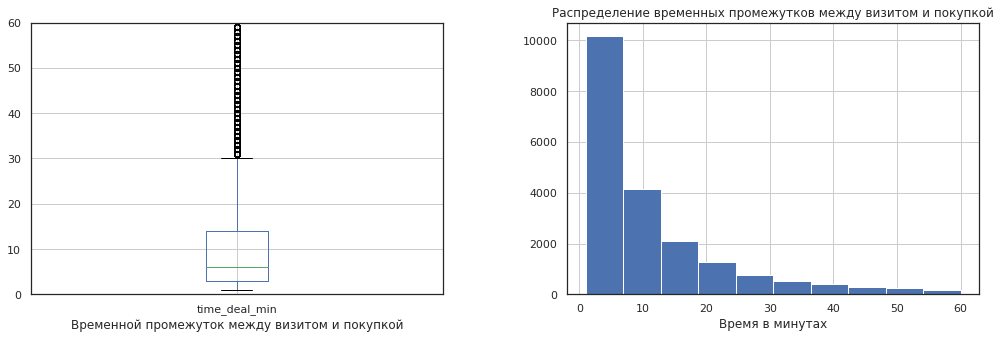

In [50]:
# Строим график распределния в первые минуты. Делаем срез по минутам от 0 до 60 мин.
plt.subplots(figsize=(17,5))
plot = customer_to_buyers.query('0 < time_deal_min < 60 ').boxplot('time_deal_min',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,60)
plt.xlabel('Временной промежуток между визитом и покупкой')

plot = customer_to_buyers.query('0 < time_deal_min < 60 ').hist(
    'time_deal_min', 
     range=(1,60), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между визитом и покупкой')
plt.xlabel('Время в минутах');
plt.show()

В целом, большая часть людей совершает первый заказ в течение 4-8 минут. В основном, пользователи во время первого посещения совершают заказ в небольшой временой промежуток — не более 10-15 минут. 

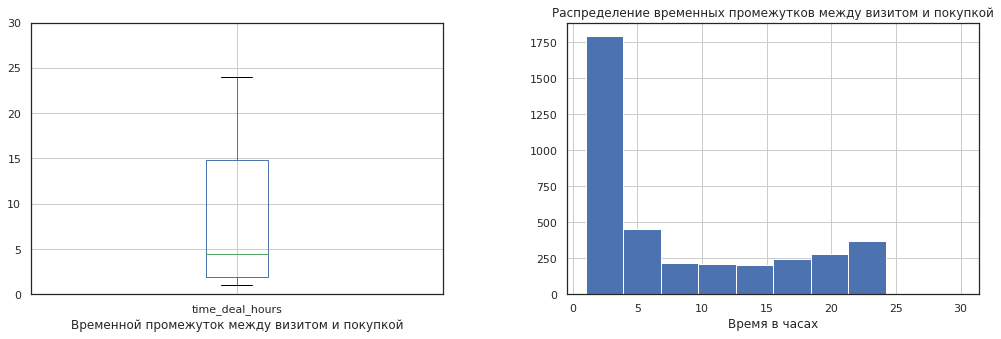

In [51]:
# Строим график распределения в первые несколько часов
plt.subplots(figsize=(17,5))
plot = customer_to_buyers.query('1 < time_deal_hours < 24').boxplot('time_deal_hours',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,30)
plt.xlabel('Временной промежуток между визитом и покупкой')

plot = customer_to_buyers.query('0 < time_deal_hours < 24 ').hist(
    'time_deal_hours', 
     range=(1,30), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между визитом и покупкой')
plt.xlabel('Время в часах');
plt.show()

Основная часть пользователей совершает покупку в первые несколько часов, во время первого посещения.

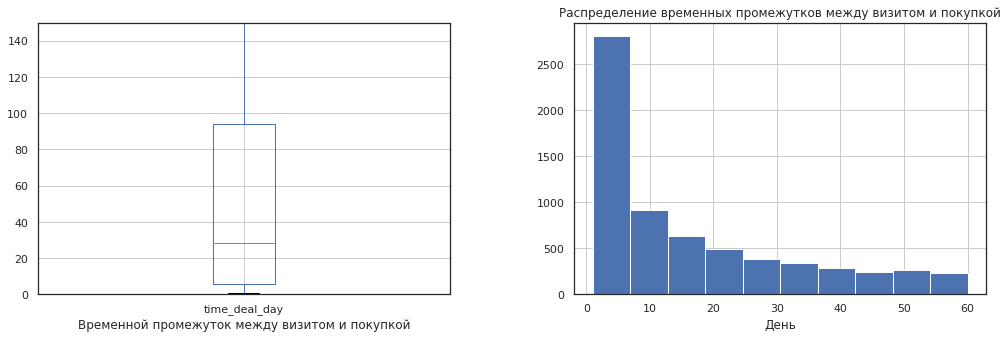

In [52]:
plt.subplots(figsize=(17,5))
plot = customer_to_buyers.query('1 < time_deal_day').boxplot('time_deal_day',
                                                                  ax = plt.subplot(1,2,1)
                                                                  )
plt.ylim(0,150)
plt.xlabel('Временной промежуток между визитом и покупкой')

plot = customer_to_buyers.query('0 < time_deal_day').hist(
    'time_deal_day', 
     range=(1,60), 
     ax = plt.subplot(1,2,2)
)
plt.title('Распределение временных промежутков между визитом и покупкой')
plt.xlabel('День');
plt.show()

Основная часть пользователей, совершает заказ в первые пять дней, во время первого посещения. Возможно, нужно дополнительно прогревать их на покупку в это время. 

In [53]:
# Посмотрим долю пользователей совершающую заказ в указанные периоды, во время первого посещения. 
minute = ((customer_to_buyers.query('time_deal_min < 60')['time_deal_min'].count()
          / customer_to_buyers.query('time_deal_min > 0')['time_deal_min'].count())
          * 100)

hours = ((customer_to_buyers.query('1 < time_deal_hours')['time_deal_hours'].count()
          / customer_to_buyers.query('time_deal_hours > 0')['time_deal_hours'].count())
          * 100)

days = ((customer_to_buyers.query('1 < time_deal_day < 24')['time_deal_day'].count()
          / customer_to_buyers.query('time_deal_day > 0')['time_deal_day'].count())
          * 100)



In [54]:
print('Процент пользователей, которые делают заказ в первые минуты:', int(minute), '%')
print()
print('Процент пользователей, которые делают заказ в первые несколько часов:', int(hours), '%')
print()
print('Процент пользователей, которые делают заказ в первые несколько дней:', int(days), '%')

Процент пользователей, которые делают заказ в первые минуты: 66 %

Процент пользователей, которые делают заказ в первые несколько часов: 40 %

Процент пользователей, которые делают заказ в первые несколько дней: 14 %


### Рассчитываем средний чек

Рассчитаем средний чек в динамике по месяцам, чтобы учесть сезонность продаж и сложить целостную картину.

In [55]:
orders['sale_month'] = pd.to_datetime(orders['buy_ts'].dt.date) - pd.to_timedelta(orders['buy_ts'].dt.dayofweek, unit='d')
orders['sale_month'] = orders['sale_month'].dt.to_period('M')

In [56]:
orders.head() # Проверяем

,buy_ts,revenue,uid,sale_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-05
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-05
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-05
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-05
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-05


In [57]:
mean_check = orders.pivot_table(index='sale_month',
                                values = 'revenue',
                                aggfunc = ['sum', 'count']).reset_index()

mean_check.columns = ['sale_month', 'sum', 'amount']
mean_check['mean_check'] = mean_check['sum'] / mean_check['amount']
mean_check.astype('int')

,sale_month,sum,amount,mean_check
0,568,1075,340,3
1,569,8951,2112,4
2,570,13311,2524,5
3,571,8550,1785,4
4,572,17739,3270,5
5,573,30802,6267,4
6,574,26157,5457,4
7,575,34057,5712,5
8,576,23437,5509,4
9,577,24996,5239,4


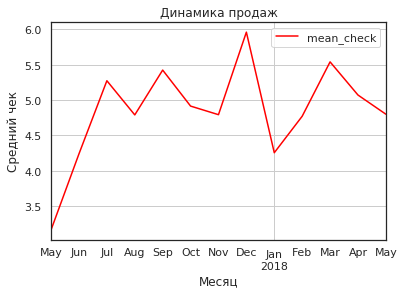

In [58]:
(mean_check.plot(x='sale_month', y='mean_check', color='red', grid=True, title='Динамика продаж')
           .set(xlabel='Месяц', ylabel='Средний чек')

)
plt.show()

С мая 2017 года средний чек имеет тенденцию к росту. Начиная с 3,1 (первый месяц работы сервиса), средний чек достигает 5,3 условных единиц. Также, максимальный средний чек наблюдается в декабре 2017, с последующей просадкой в январе 2018 года. Предполагаем, что это связано с новогодними праздниками и акционными предложениями. 

В феврале 2018 года, снова отмечается рост среднего чека до марта месяца. После, идет планомерное стремительное снижение. Необходимо изучить данный период подробнее. Для предположения о влиянии сезонности продаж, у нас недостаточно данных. Так как, мы видим тенденцию роста в самом начале работы сервиса, приходящуюся на летние месяцы, легкую просадку осенью, и бурный рост в начале зимы. С 2018 года, картина меняется. Снижение среднего чека приближается к летним месяцам. 

Помимо этого, мы должны учесть когорты активных покупателей и коэффициент удержания пользователей. Предположительно, последующий средний чек делают платежеспособные клиенты, которые продолжают использовать сервис. 

### Количество покупок за период

In [59]:
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_orders']
orders_check = pd.merge(orders, first_orders, on='uid')

In [60]:
orders_check['first_sale_month'] = orders_check['first_orders'].astype('datetime64[M]')
orders_check['order_month'] = orders_check['buy_ts'].astype('datetime64[M]')


In [61]:
orders_check_cohort = orders_check.groupby(
    ['first_sale_month', 'order_month']).agg({'uid':'count'}).reset_index()

orders_check_cohort['cohort_lifetime'] = (
    (orders_check_cohort['order_month'] - orders_check_cohort['first_sale_month'])
    / np.timedelta64(1, 'M')
).round().astype('int')

In [62]:
orders_check_cohort['first_sale_month'] = orders_check_cohort['first_sale_month'].dt.strftime('%Y-%m')

In [63]:
orders_pivot = orders_check_cohort.pivot_table(
        index='first_sale_month',
        columns='cohort_lifetime',
        values='uid',
        aggfunc='mean'
)
orders_pivot.columns.name = 'Месячный возраст когорты'
orders_pivot.index.name = 'Когорта'
orders_pivot = orders_pivot.fillna('')
print('Количество покупок в когортах за период по месяцам')
orders_pivot

Количество покупок в когортах за период по месяцам


Месячный возраст когорты,0,1,2,3,4,5,6,7,8,9,10,11
Когорта,,,,,,,,,,,,
2017-06,2354.0,177,174,226,292,218,276,174,212,153,96,86
2017-07,2186.0,100,120,104,72,82,61,50,58,24,53,
2017-08,1533.0,108,100,81,85,62,49,78,46,46,,
2017-09,2933.0,219,161,164,67,109,108,56,61,,,
2017-10,4964.0,314,162,122,129,103,86,125,,,,
2017-11,4813.0,397,182,211,136,59,102,,,,,
2017-12,5052.0,270,202,179,86,105,,,,,,
2018-01,3783.0,224,159,64,78,,,,,,,
2018-02,4095.0,222,83,70,,,,,,,,


Количество покупок за данный период соответвует результатам о коэффициенте удержания пользователей (Retantion). Выделяются отдельные значения по месяцам. Так, в мае 2017 (первый месяц) количество покупок держится на одном уровне достаточно длительное время. Наиболее покупающими оказались когорты начала зимы (ноябрь-декабрь) 2017 года. Это связано с проведением массовых праздничных мероприятий, акционными прлеожениями и возможно, с сезонностью. 

В целом, между когортами наблюдается увеличение покупок, а затем планомерное снижение. 

Таким образом, мы видим как с каждым разом уменьшается количество повторных заказов и уменьшается возвращение пользователей. 

### Рассчитываем метрику LTV

Нам необходимо посчитать экономику одного покупателя. Для этого, мы должны рассчитать LTV (от англ. lifetime value) — «пожизненная»ценность клиента. Это — итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок. 

In [64]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
initial_order = orders.groupby('uid').agg({'order_month':'min'}).reset_index()
initial_order.columns = ['uid', 'initial_order_month']

In [65]:
order_sale_cohort = initial_order.groupby('initial_order_month').agg({'uid':'nunique'}).reset_index()
order_sale_cohort.columns = ['initial_order_month', 'number_users']

In [66]:
ltv = pd.merge(orders, initial_order, on='uid')
cohorts = ltv.groupby(['initial_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [67]:
report = pd.merge(order_sale_cohort, cohorts, on='initial_order_month')
report['age'] = (report['order_month'] - report['initial_order_month'])/np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['number_users']

In [68]:
display = report.pivot_table(
        index = 'initial_order_month',
        columns = 'age',
        values = 'ltv',
        aggfunc = 'mean'
).round(2)
display.columns.name = 'Возраст'
display.index.name = 'Когорта'
display = display.fillna('')
display

Возраст,0,1,2,3,4,5,6,7,8,9,10,11
Когорта,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Показатель LTV снижается в когортах в соответсвии с возрастом. Это связано с тем, что активных пользователей со временем становится меньше. Наибольшую прибыль LTV принесла сентябрьская когорта в 2017 году. Также, неплохой показатель у декабрьской когорты 2017 года.
Наименьшую прибыль LTV показали январская и февральская когорты 2018 года. 

Таким образом, скорее всего многие пользователи покупали билеты на мероприятия заранее, осенью. Потом, докупали их зимой, на новые мероприятия и используя акционные предложения. После продажи значительно проседают. В целом, показатель LTV довольно низкий. 

### Вывод

В целом, большая часть 66 % пользователей совершают первый заказ в течение 4-8 минут. В основном, клиенты во время первого посещения совершают заказ в небольшой временой промежуток — не более 10-15 минут. Или в первые несколько часов (40% пользователей). Возможно, это и не плохо, пользователь проходит путь: выбор нужного раздела, прочтение краткой информации о мероприятии, выбор места в зале, переход на онлайн-кассу.

Конечно же, можно оптимизировать перход в оплату, например вести клиента сразу на прайсовую с рекламного баннера. 

Также, мы узнали, что 14% пользователей, совершает заказ в первые пять дней, во время первого посещения. Возможно, нужно дополнительно прогревать данных пользователей на покупку в этот временной период. 

С мая 2017 года средний чек имеет тенденцию к росту. Начиная с 3,1 (первый месяц работы сервиса), средний чек достигает 5,3 условных единиц. Также, максимальный средний чек наблюдается в декабре 2017, с последующей просадкой в январе 2018 года. Предполагаем, что это связано с новогодними праздниками и акционными предложениями.
В феврале 2018 года, снова отмечается рост среднего чека до марта месяца. После, идет планомерное стремительное снижение. Необходимо изучить данный период подробнее. 

Мы видим тенденцию роста в самом начале работы сервиса, приходящуюся на летние месяцы, легкую просадку осенью, и бурный рост в начале зимы. С 2018 года, картина меняется. Снижение среднего чека приближается к летним месяцам.


Количество покупок за данный период соответвует результатам о коэффициенте удержания пользователей (Retantion). Выделяются отдельные значения по месяцам. Так, в мае 2017 (первый месяц) количество покупок держится на одном уровне достаточно длительное время. Наиболее покупающими оказались когорты начала зимы (ноябрь-декабрь) 2017 года. Это связано с проведением массовых праздничных мероприятий, акционными прлеожениями и возможно, с сезонностью.

В целом, между когортами наблюдается увеличение покупок, а затем планомерное снижение.

Таким образом, мы видим как с каждым разом уменьшается количество повторных заказов и уменьшается возвращение пользователей.

Показатель LTV снижается в когортах в соответсвии с возрастом когорты. Это связано с тем, что активных пользователей со временем становится меньше. Наибольшую прибыль LTV принесла сентябрьская когорта в 2017 году. Также, неплохой показатель у декабрьской когорты 2017 года. Наименьшую прибыль LTV показали январская и февральская когорты 2018 года.

Таким образом, скорее всего многие пользователи покупали билеты на мероприятия заранее, осенью. Потом, докупали их зимой, на новые мероприятия и используя акционные предложения. После продажи значительно проседают. В целом, показатель LTV довольно низкий.

## Глава 5. Анализ маркетинговых показателей

### Суммарные рассходы с разбивкой по рекламным источникам и месяцам

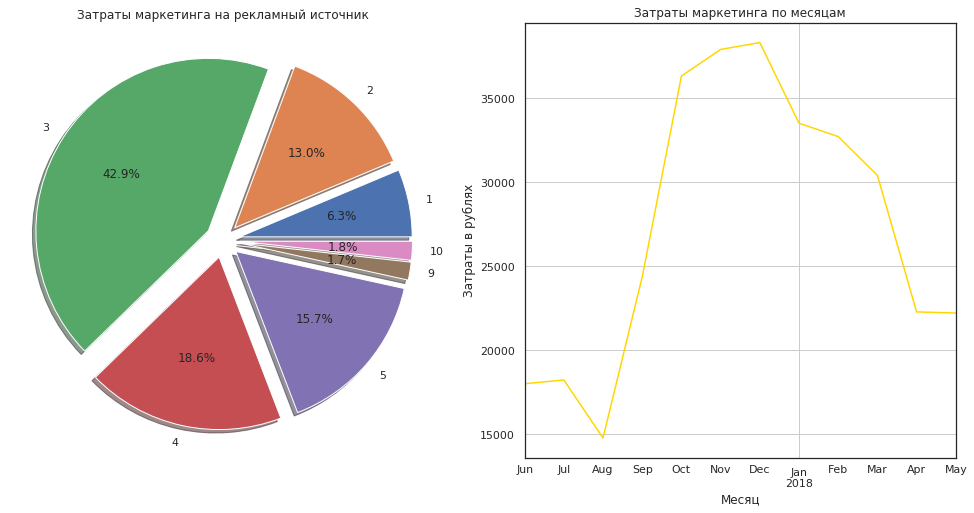

In [69]:
# Ранее мы уже анализировали рекламные источники, рассчитывали траты на каждый из них и строиили соответствующие диаграммы. 
# Поэтому, сейчас мы скопируем ту часть работы с новыми добавлениями для рассчета.
costs['month'] = costs['date'].astype('datetime64[M]')
costs_sum = costs['costs'].sum()
plt.subplots(figsize=(17, 8))
plot = costs.pivot_table(
        index='source_id',
        values='costs',
        aggfunc='sum'
).plot(
        kind='pie',
        autopct='%1.1f%%',
        title='Затраты маркетинга на рекламный источник',
        y='costs',
        legend=False,
        explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),
        shadow=True,
        ax=plt.subplot(1,2,1)
)
plt.ylabel('')
plot = costs.pivot_table(
    index='month',
    values='costs',
    aggfunc='sum'    
).reset_index().plot(
                    x='month',
                    y='costs',
                    grid=True,
                    legend=False,
                    color='gold',
                    ax = plt.subplot(1,2,2), title = 'Затраты маркетинга по месяцам' 
)
plt.ylabel('Затраты в рублях')
plt.xlabel('Месяц');

In [70]:
print('Суммарные затраты на маркетинг за данный период', costs_sum, 'рублей')

Суммарные затраты на маркетинг за данный период 329131.62 рублей


Затраты на рекламу имеют явную сезонную стратегию — повышаются с осени, достигая максимума к зимнему периоду праздников. Далее идет снижение с весны по летний период. Большая часть вложений приходится на рекламное размещение № 3, после чего равные доли распределяются по № 4, №5, и № 2. На остальные источники уходит остаток маркетингового бюджета (надеемся это делается не для отчетности). 

Суммарные затраты на маркетинг за данный период составляют 329 тыс. рублей.

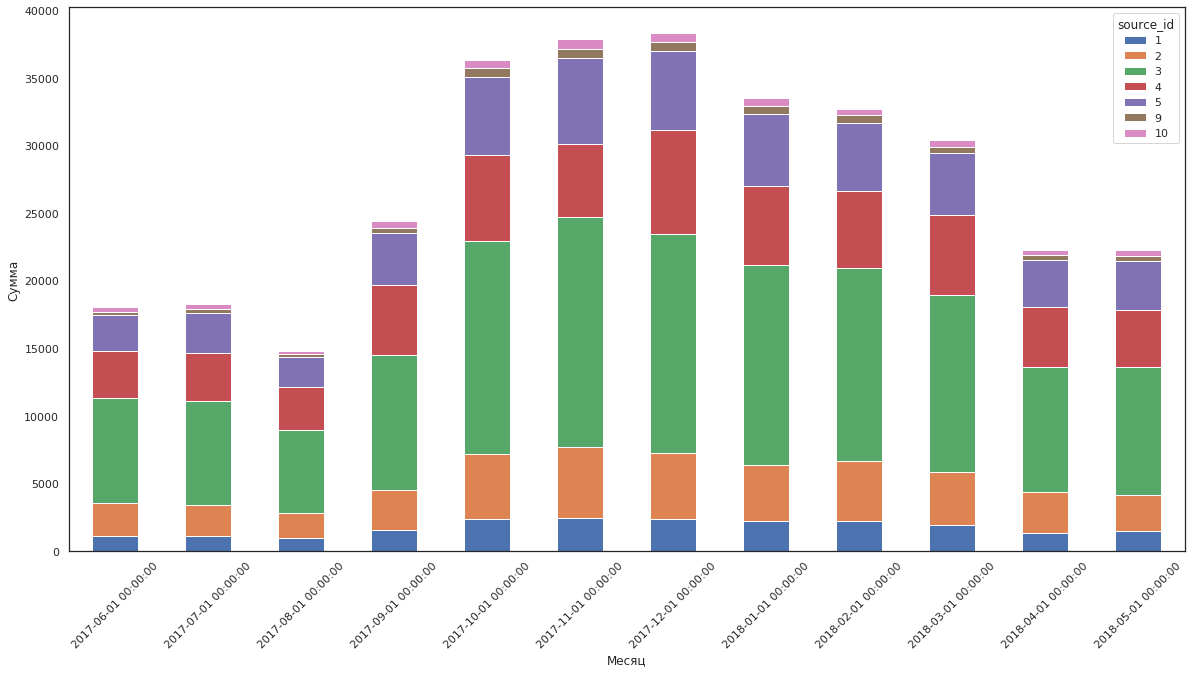

In [71]:
# Построим график отображающий траты по каждому рекламному размещению и по всем месяцам за данный период.
costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'    
).reset_index().plot(kind='bar',
                    x='month', figsize=(20, 10), stacked=True, rot=45).set(xlabel='Месяц', 
                                                                                    ylabel='Сумма')
plt.show()

Наибольшие траты осущетвляются на рекламный источник №3 в течение всего временного периода. 

### Стоимость привлечения одного покупателя из каждого рекламного источника 

In [72]:
# Соотносим посетителя рекламному источнику из условия. Предположительно самый ранний переходи приводит к покупке
clients_group_id = visits.groupby(['uid', 'source_id']).agg({'start_ts':'min'}).reset_index()
clients_source = clients_group_id[['uid', 'source_id']]

# Сумма потраченных средств на каждый рекламный источник
cost_sources = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Собираем все в один сет по соответвию ракламного источника заказу
orders_sources = pd.merge(clients_source, orders, on='uid')

In [73]:
# Группируем по рекламному источнику, подсчитываем число уникальных покупателей и суммарную выручку из 1 источника
orders_group_sources = orders_sources.groupby('source_id').agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_group_sources.columns = ['source_id', 'number_buyers', 'sum_revenue']

In [74]:
report_cost = pd.merge(orders_group_sources, cost_sources, on='source_id')

report_cost['per_user_cost'] = report_cost['costs'] / report_cost['number_buyers']

report_cost['per_user_revenue'] = report_cost['sum_revenue'] / report_cost['number_buyers']

In [75]:
report_cost['per_user_cost'] = report_cost['per_user_cost'].round(2)
report_cost['per_user_revenue'] = report_cost['per_user_revenue'].round(2)
report_cost.columns = ['Номер рекламного размещения', 'Кол-во покупателей', 'Выручка', 'Затраты', 'Уд.затраты', 'Уд.выручка']
report_cost

,Номер рекламного размещения,Кол-во покупателей,Выручка,Затраты,Уд.затраты,Уд.выручка
0,1,7138,101631.38,20833.27,2.92,14.24
1,2,7305,113524.51,42806.04,5.86,15.54
2,3,13846,119193.48,141321.63,10.21,8.61
3,4,14253,119899.47,61073.60,4.28,8.41
4,5,10156,111532.65,51757.10,5.10,10.98
5,9,2793,18809.68,5517.49,1.98,6.73
6,10,1773,8218.72,5822.49,3.28,4.64


Несмотря на то, что большая часть вложений приходится на рекламное размещение № 3, на данный момент оно еще не окупилось. При этом, даже большое количество покупателей (13 тыс.) пришедших с данного рекламного источника не покрывает сумму затрат. 

Остальные рекламные источники отлично отработали. Некоторые из них, например размещение № 1, окупились сполна. 

Помимо этого, стоит отметить рекламные источники № 9 и 10, те, на которые тратится остаток рекламного бюджета. Они оказались довольно прибыльными.

Лучше всего сработал рекламный источник № 4. Он привел больше всего покупателей и окупился.

Необходимо пересмотреть распределение рекламного бюджета.

### Рассчитываем метрику ROI

In [76]:
cost_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
roi_report = pd.merge(report, cost_month, left_on='initial_order_month', right_on='month')

roi_report['cac'] = roi_report['costs'] / roi_report['number_users']
roi_report['roi'] = roi_report['ltv'] / roi_report['cac']

roi_output = roi_report.pivot_table(
        index='initial_order_month',
        columns= 'age',
        values = 'roi',
        aggfunc = 'mean'
)
roi_output.columns.name = 'Месячный возраст когорты'
roi_output.index.name = 'Когорта'
roi_output.cumsum(axis=1).round(2).fillna('')

Месячный возраст когорты,0,1,2,3,4,5,6,7,8,9,10,11
Когорта,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [77]:
roi_output.cumsum(axis=1).mean(axis=0)

Месячный возраст когорты
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В основном ни одна когорта не окупает инвестиций в собственное привлечение. В среднем, период окупаемости составляет около 10 месяцев (практически год). То есть, даже в дальнейшей перспективе, затраты на маркетинг не окупают себя. Лишь рекламный источник №1 и №4 показывают положительную тенденцию, возможно использовать лучше именно его. Сопоставляя все полученные данные и финансирование рекламных вложений, удельные затраты и выручку, мы приходим к выводу, что рекламный источник № 3 не является прибыльным. Это ошибочная рекламная стратегия, ее необходимо пересмотреть. 

In [78]:
visits1 = pd.read_csv('/datasets/visits_log.csv')
orders1 = pd.read_csv('/datasets/orders_log.csv')
costs1 = pd.read_csv('/datasets/costs.csv')




In [79]:
# Будем копировать определенную часть действий сделанных ранее
visits1.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid'] 
orders1.columns = ['buy_ts', 'revenue', 'uid'] 
costs1.columns = ['source_id', 'date', 'costs']

In [80]:

# Переводим в формат даты
visits1['end_ts'] = pd.to_datetime(
    visits1['end_ts'], 
    format='%Y-%m-%d %H:%M'
)
visits1['start_ts'] = pd.to_datetime(
    visits1['start_ts'],
    format='%Y-%m-%d %H:%M' 
)
orders1['buy_ts'] = pd.to_datetime(
    orders1['buy_ts'],
    format='%Y-%m-%d %H:%M:%S'
)
costs1['date'] = pd.to_datetime(
    costs1['date'],
    format='%Y-%m-%d')

In [81]:
visits_lol = visits1.query("device == 'touch'")
orders2 = orders1.merge(visits_lol, on='uid')

In [82]:
first_order_date = orders2.groupby('uid')['buy_ts'].min().reset_index() # Группируем по первому заказу
first_order_date.columns = ['uid','first_order_date']
orders_check = pd.merge(orders2,first_order_date, on='uid')



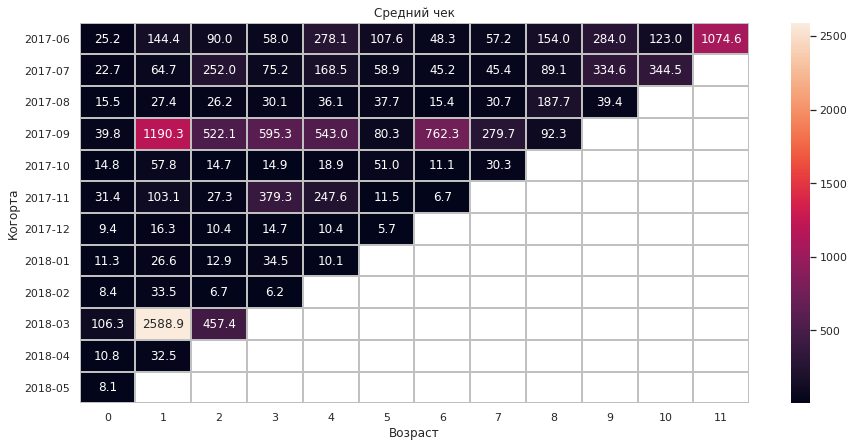

In [83]:
# Рассчитываем средний чек и сразу проводим когортный анализ
orders_check['first_order_month'] = orders_check['first_order_date'].astype('datetime64[M]')
orders_check['order_month'] = orders_check['buy_ts'].astype('datetime64[M]')
orders_group_by_cohorts = orders_check.groupby(
    ['first_order_month','order_month']).agg({'uid':'nunique','revenue':'sum'}).reset_index()
orders_group_by_cohorts['revenue_per_user'] = orders_group_by_cohorts['revenue'] / orders_group_by_cohorts['uid']
orders_group_by_cohorts['cohort_lifetime'] = (
    (orders_group_by_cohorts['order_month'] - 
    orders_group_by_cohorts['first_order_month'])/np.timedelta64(1,'M')
).round().astype('int')
orders_group_by_cohorts['first_order_month'] = orders_group_by_cohorts['first_order_month'].dt.strftime('%Y-%m')
orders_pivot_revenue = orders_group_by_cohorts.pivot_table(
    index = 'first_order_month',
    columns = 'cohort_lifetime',
    values = 'revenue_per_user',
    aggfunc = 'mean'
)
plt.figure(figsize=(15,7))
plt.title('Средний чек')
sns.heatmap(
    orders_pivot_revenue,
    annot = True,
    fmt='.1f',
    linewidths = 1,
    linecolor = 'silver'
)
plt.xlabel('Возраст')
plt.ylabel('Когорта');

В целом средний чек по мобильному приложению гораздо выше чем по декстопной версии. Выделяется самая первая майская когорта 17 года. Также, хорошо себя показывает сентябрьская когорта 17го и бурный рост по продажам в марте 18го. Есть небольшая просадка по декабрю.

Таким образом, мобилка хорошо отработала в самом начале, осенью, и в первый месяц весны. При этом, мы помним, что общие данные по двум устройствам показывают просадку в весеннее время, видимо мобильное приложение спасает продажи в данный период. А в декабрьский месяц лучше работает декстопная версия.

Также, мы видим отдельные высокие значения по молодым когортам. В некоторых случаях они сменяют спад. Возможно, в данных случаях срабатывает реклама.

Отдельный положительный выборос в марте, возможно связан с популярным мероприятием.

In [84]:
orders2['sales_month'] = pd.to_datetime(orders2['buy_ts'].dt.date) - pd.to_timedelta(orders2['buy_ts'].dt.dayofweek, unit='d')
orders2['sales_month'] = orders2['sales_month'].dt.to_period('M')


In [85]:
mean_check_lol = orders2.pivot_table(index='sales_month',
                                values = 'revenue',
                                aggfunc = ['sum', 'count']).reset_index()

mean_check_lol.columns = ['sales_month', 'sum', 'amount']
mean_check_lol['mean_check'] = mean_check_lol['sum'] / mean_check_lol['amount']
mean_check_lol.astype('int')

,sales_month,sum,amount,mean_check
0,568,577,251,2
1,569,11162,1349,8
2,570,14805,1964,7
3,571,8293,1307,6
4,572,29367,2336,12
5,573,74660,6541,11
6,574,59906,6783,8
7,575,29381,4969,5
8,576,26380,4695,5
9,577,31382,4163,7


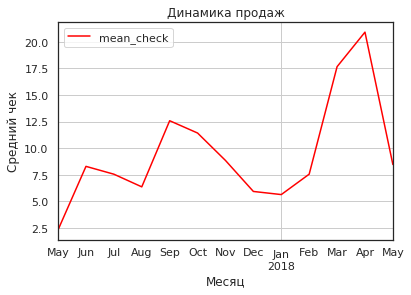

In [86]:
(mean_check_lol.plot(x='sales_month', y='mean_check', color='red', grid=True, title='Динамика продаж')
           .set(xlabel='Месяц', ylabel='Средний чек')

)
plt.show()

Стоимость привлечения одного покупателя из каждого рекламного источника



In [87]:
# Соотносим посетителя рекламному источнику из условия. Предположительно самый ранний переход приводит к покупке
clients_group_idi = visits_lol.groupby(['uid', 'source_id']).agg({'start_ts':'min'}).reset_index()
clients_sources = clients_group_idi[['uid', 'source_id']]

# Сумма потраченных средств на каждый рекламный источник
cost_sourcess = costs1.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Собираем все в один сет по соответвию ракламного источника заказу
orders_sourcess = pd.merge(clients_sources, orders1, on='uid')

# Группируем по рекламному источнику, подсчитываем число уникальных покупателей и суммарную выручку из 1 источника
orders_group_sourcess = orders_sourcess.groupby('source_id').agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_group_sourcess.columns = ['source_id', 'number_buyers', 'sum_revenue']

report_costs = pd.merge(orders_group_sourcess, cost_sourcess, on='source_id')

report_costs['per_user_cost'] = report_costs['costs'] / report_costs['number_buyers']

report_costs['per_user_revenue'] = report_costs['sum_revenue'] / report_costs['number_buyers']
report_costs['per_user_cost'] = report_costs['per_user_cost'].round(2)
report_costs['per_user_revenue'] = report_costs['per_user_revenue'].round(2)
report_costs.columns = ['Номер рекламного размещения', 'Кол-во покупателей', 'Выручка', 'Затраты', 'Уд.затраты', 'Уд.выручка']
report_costs

,Номер рекламного размещения,Кол-во покупателей,Выручка,Затраты,Уд.затраты,Уд.выручка
0,1,1778,21297.24,20833.27,11.72,11.98
1,2,1981,22564.12,42806.04,21.61,11.39
2,3,2714,19921.37,141321.63,52.07,7.34
3,4,3654,28249.98,61073.60,16.71,7.73
4,5,1877,13149.67,51757.10,27.57,7.01
5,9,633,3471.04,5517.49,8.72,5.48
6,10,397,1832.34,5822.49,14.67,4.62


In [88]:
visits_desktop = visits1.query("device == 'desktop'")
orders_desktop = orders1.merge(visits_desktop, on='uid')


In [89]:
orders_desktop['buy_month'] = pd.to_datetime(orders_desktop['buy_ts'].dt.date) - pd.to_timedelta(orders_desktop['buy_ts'].dt.dayofweek, unit='d')
orders_desktop['buy_month'] = orders_desktop['buy_month'].dt.to_period('M')

In [90]:
mean_check_desktop = orders_desktop.pivot_table(index='buy_month',
                                values = 'revenue',
                                aggfunc = ['sum', 'count']).reset_index()

mean_check_desktop.columns = ['buy_month', 'sum', 'amount']
mean_check_desktop['mean_check'] = mean_check_desktop['sum'] / mean_check_desktop['amount']
mean_check_desktop.astype('int')

,buy_month,sum,amount,mean_check
0,568,18733,3378,5
1,569,125321,22329,5
2,570,253793,37575,6
3,571,210899,32013,6
4,572,682141,59461,11
5,573,650015,73300,8
6,574,484648,63939,7
7,575,1329014,86776,15
8,576,603317,76757,7
9,577,580775,86049,6


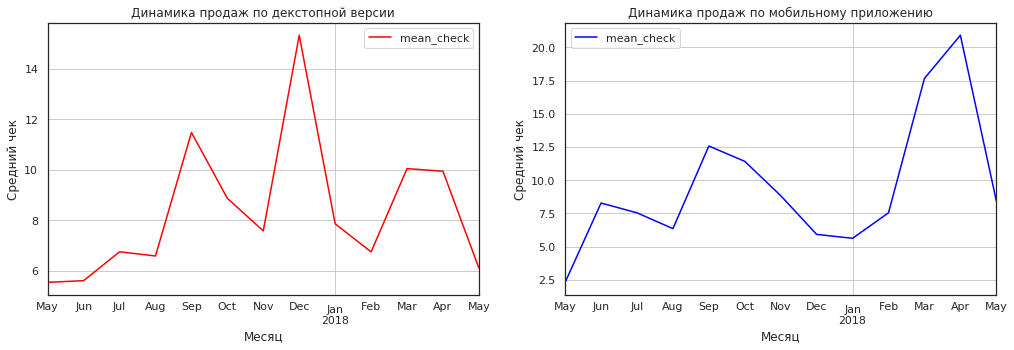

In [91]:
plt.subplots(figsize=(17,5))
plot = (mean_check_desktop.plot(x='buy_month', y='mean_check', 
                                color='red', grid=True, 
                                title='Динамика продаж по декстопной версии', ax = plt.subplot(1,2,1))
           .set(xlabel='Месяц', ylabel='Средний чек')

)
plot = (mean_check_lol.plot(x='sales_month', y='mean_check', 
                            color='blue', grid=True, title='Динамика продаж по мобильному приложению',
                           ax = plt.subplot(1,2,2))
           .set(xlabel='Месяц', ylabel='Средний чек')

) 
plt.show();

In [92]:
print('Средний чек по декстопу за данный период: {:.2f}'.format(mean_check_desktop['mean_check'].sum()))
print('Средний чек по мобильному приложению за данный период: {:.2f}'.format(mean_check_lol['mean_check'].sum()))

Средний чек по декстопу за данный период: 108.43
Средний чек по мобильному приложению за данный период: 123.37


В сумме по месяцам средний чек мобилки выше, чем у декстопной версии. Но все же работают они взаимодополняюще. Там, где проседают продажи по декстопу прибыль показывает мобилка, и наоборот.

### Вывод
Похоже в случае мобильного приложения реклама слабо срабатывает. Пользователи с рекламы идут на декстопную версию, узнают про мероприятие, а покупки совершают позже и с мобильного приложения. Видимо активно используют кэшбек приложения.

Помимо этого, приложение спасает продажи в периоды просадок по декстопной версии.

## Финальный вывод
**Тезисно:**

- Платформа «Яндекс.Афиши» может быть успешна и имеет потенциал для роста. Но на данный момент, обладает **крайне мылым количеством клиентов** и это повторяется системно за весь рассмотренный период — 2017-2018 год. 




- Пользователи чаще используют **компьютер/ноутбук** во время перехода на сайт. *Необходимо обратить внимание на мобильную версию сайта, возможно, проверить приложение на корректную работу.*



- За рассматриваемый период среднее количество уникальных пользователей составляет **907 человек за день.** Недельное посещение составляет 5 716 человек, а месячное — около 23 тыс. человек. **При этом регулярность использования «Яндекс.Афиши» довольно низкая и составляет 15% в неделю, и 3% в месяц. Это означает, что пользователи редко обращаются к приложению/сайту.** *Необходимо обратить внимание на конкурирующие агрегаторы и приложения-афиши, изучить их специфику.*



- Самая частая продолжительность сессии составляет примерно **4 минуты.** А самое встречаемое значение в данной выборке равно **1 минуте.** **То есть, короткие временные сессии значительно преобладают.** Редкие сессии длящиеся более 10 минут составляют около 30% от общего числа. **Это говорит нам о том, что на сайте «Яндекс.Афиши» есть существенные недоработки или тех. ошибки отталкивающие пользователей.** *Возможно, неудобный интерфейс, неудобные кнопки переходов, большой выбор контента, который путает пользователя. Необходимо давать готовые решения и сокращать действия пользователя, например учитывая его предыдущие выборы мероприятий и даты (праздничный день, день рождения и т.д.), подавать нативную рекламу по схожим условиям. Давать сразу готовый выбор и вести на оплату. На данный момент, короткое время использования сервиса за сессию говорит нам, что пользователь узнает о предстоящем мероприятии на сторонних ресурсах, и переходит лишь для разовый оплаты.* 



- Коэффициент удержания пользователей — **низкий, также наблюдается тенденция падения показателей с течением времени.** Стоит отметить, что до октября-декабря 2017 года наблюдается рост в возращении пользователей, но после этой даты идет стремительное снижение. Таким образом, отмечается быстроее сокращение коэффициента удержания у более молодых когорт. *Возможно, это связано наступлением праздников, появлением популярных мероприятий, а также, акциями и распродажами на сайте. Необходимо повышать лояльность пользователей. Например, делать более понятный контент, особенно в описании предстоящих мероприятий. Сейчас, читая описание театральных постановок, преобладают возвышенные и абстрактные слова, которые не дают понимания события. Хороший редакционный состав, думаю здесь поможет. Также, проводить различные конкурсы/розыгрыши, развлекательные тесты, письменную рассылку и пр. Возможно, нужно ввести систему кэшбека и подардков.*



- В целом, большая часть людей совершает первый заказ в течение **4-8 минут.** В основном, пользователи во время первого посещения совершают заказ в небольшой временой промежуток — не более 10-15 минут. С мая 2017 года средний чек имеет тенденцию к росту. Также, **максимальный средний чек наблюдается в декабре 2017, с последующей просадкой в январе 2018 года.** Предполагаем, что это связано с новогодними праздниками и акционными предложениями. Количество покупок за данный период соответвует результатам о коэффициенте удержания пользователей (Retantion). Выделяются отдельные значения по месяцам. Так, в мае 2017 (первый месяц) количество покупок держится на одном уровне достаточно длительное время. Наиболее покупающими оказались когорты начала зимы (ноябрь-декабрь) 2017 года. Это связано с проведением массовых праздничных мероприятий, акционными прлеожениями и возможно, с сезонностью. В целом, между когортами наблюдается увеличение покупок, а затем планомерное снижение.**Таким образом, мы видим как с каждым разом уменьшается количество повторных заказов и уменьшается возвращение пользователей.**


- Показатель LTV снижается в когортах в соответсвии с возрастом. Это связано с тем, что активных пользователей со временем становится меньше. Наибольшую прибыль LTV принесла сентябрьская когорта в 2017 году. Также, неплохой показатель у декабрьской когорты 2017 года. Наименьшую прибыль LTV показали январская и февральская когорты 2018 года. *Таким образом, скорее всего многие пользователи покупали билеты на мероприятия заранее, осенью. Потом, докупали их зимой, на новые мероприятия и используя акционные предложения. После, продажи значительно проседают. В целом, показатель LTV довольно низкий. Нужно дополнительно прогревать данных пользователей на покупку в первые пять дней после захода на сайт, если не совершил покупку. Например, доп. рассылка, pop-up при повторном заходе, забытая корзина (отметка, что вы смотрели такие-то мероприятия, а билеты сгорают). Также, прогревать пользователей в месяци просадок, то есть готовить к покупкам.* 



- Затраты на рекламу имеют явную сезонную стратегию — повышаются с осени, достигая максимума к зимнему периоду праздников. Далее идет снижение с весны по летний период. Большая часть вложений приходится на рекламное размещение **№ 3**, после чего равные доли распределяются по № 4, №5, и № 2. На остальные источники уходит остаток маркетингового бюджета. Несмотря на то, что большая часть вложений приходится на **рекламное размещение № 3**, на данный момент оно **убыточное.** При этом, даже большое количество покупателей (13 тыс.) пришедших с данного рекламного источника **не покрывает сумму затрат.** Остальные рекламные источники отлично отработали. Некоторые из них, например размещение № 1, окупились сполна. Помимо этого, стоит отметить рекламные источники № 9 и 10, те, на которые тратится остаток рекламного бюджета. Они оказались довольно прибыльными. Лучше всего сработал рекламный источник № 4. Он привел больше всего покупателей и окупился. *Необходимо пересмотреть распределение рекламного бюджета.*


- Суммарные затраты на маркетинг за данный период составляют **329 тыс. рублей.** В основном ни одна когорта не окупает инвестиций в собственное привлечение. В среднем, период окупаемости составляет около 10 месяцев (практически год). То есть, даже в дальнейшей перспективе, затраты на маркетинг **не окупают себя.** *Это ошибочная рекламная стратегия, ее необходимо пересмотреть. Лишь рекламный источник №1 и №4 показывают положительную тенденцию, возможно использовать лучше именно их.*